<a href="https://colab.research.google.com/github/hazrakeruboO/DS-Colabs/blob/main/Copy_of_Python_Programming_Regression_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

## Python Programming:Regression using Neural Networks

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Import an Multi-Layer Perceptron Regressor model estimator from Scikit-Learn's neural_network library
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix


### Example 1

In this example we are going to use a dataset that we've have worked with before for the purpose of comparing the perfomance of the model.

Remember the example we looked at while doing linear regression, we'll tackle the same problem but now using neural networks. 

To refresh your mind, we were trying to predict a students chance of getting into grad school based on some tests.

Let's dive in!!

**Loading data**

In [ ]:
#load the data
data = pd.read_csv('http://bit.ly/uni_admission')
data.head()

,Serial No.,GRE,TOEFL,uni_rating,SOP,LOR,CGPA,publications,admit_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Using 1 feauture
First, we'll use only 1 feature and see how it performs then, we'll go ahead and increase the number of features.

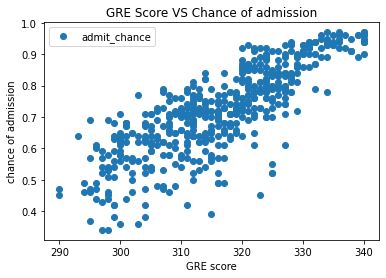

In [ ]:
# First, we'll use the GRE test scores to predict

X = data['GRE'].values
y = data['admit_chance']


data.plot(x='GRE', y='admit_chance', style='o')
plt.title('GRE Score VS Chance of admission')
plt.xlabel('GRE score')
plt.ylabel('chance of admission')
plt.show()

In [ ]:
# Split the dataset into train and test set
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=20)

# Just like we did in the classifier, we need to normalize our data

# Initialize the scaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_train.reshape(-1,1)) # Here, we are using reshape because normally the scaler expects a 2D array but we have given it a 1D array instead. So we reshape the array and tell it that we have 1 array and an unknown number rows,

# Applying the transformation to the data
X_train = scaler.transform(X_train.reshape(-1,1))

X_test = scaler.transform(X_test.reshape(-1,1))


**Training the Model**

Similar to the model classifier, the regressor also using the same parameters.

In [ ]:
# Instatiating the model
mlp = MLPRegressor(hidden_layer_sizes=(50,50), solver='sgd', activation='identity') #Since we are doing a linear regression then we don't really need the activation function so we use activation as identity

# fitting the model
mlp.fit(X_train,y_train)

MLPRegressor(activation='identity', hidden_layer_sizes=(50, 50), solver='sgd')

**Prediction**

In [ ]:
# Predicting
y_pred = mlp.predict(X_test.reshape(-1,1))

**Visualization**

Since we are using only 1 feature, we can easily visualize the results

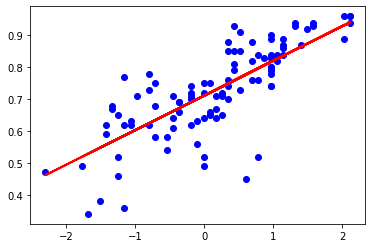

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

**Evaluaton**


In [ ]:
# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  


Mean Absolute Error: 0.06589312607843985
Mean Squared Error: 0.008032856525187721
Root Mean Squared Error: 0.08962620445599447


#### Using Muiltiple feautures

In [ ]:
# Seperating our target from our features
X = data[['GRE','TOEFL']].values
y = data['admit_chance']

In [ ]:
# Split the data
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 20)

# Initialize the scaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_train )

# Applying the transformation to the data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


**Model Training**


In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(50,50), solver='sgd', activation='identity')

# Fitting the model
mlp.fit(X_train,y_train)

MLPRegressor(activation='identity', hidden_layer_sizes=(50, 50), solver='sgd')

**Prediction**

In [ ]:
# Making predictions
y_pred = mlp.predict(X_test)

**Model Evaluation**

In [ ]:
# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.06836754850622657
Mean Squared Error: 0.008664096501685332
Root Mean Squared Error: 0.09308112860126552


**Conclusion**

We can conclude that there is a slight improvement when using multiple features. This is refected by the decrease in the RMSE.

Remember, you can always tune your parameters for better results

### <font color='green'>Challenge</font>

In [4]:
# Use NN to predict a persons salary based on their experience
# Dataset url ------> http://bit.ly/salary_dataset
salary=pd.read_csv('http://bit.ly/salary_dataset')
salary.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [10]:
salary['Position'].values

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

In [11]:
salary['Position'].values

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [18]:
# label_encoder object knows how to understand word labels.
encoder = OneHotEncoder()
data=asarray([['Business Analyst'],['Junior Consultant'],['Senior Consultant'],['Manager']
['Region Manager'],['Partner'],['Country Manager'],['Senior Partner'],['C-level'],['CEO']])
print(data)
 
# Encode labels in column 'species'.
salary= encoder.fit_transform(data)
 
#salary['Position'].unique()

NameError: ignored

In [ ]:
# Seperating our target from our features
X_sal = salary[['Level','Salary']].values
y_sal = salary['Position']

In [ ]:
# Split the data
X_sal, X_test, y_sal,y_test = train_test_split(X_sal,y_sal, test_size=0.2, random_state = 20)



# Initialize the scaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_sal )

# Applying the transformation to the data
X_train = scaler.transform(X_sal)

X_test = scaler.transform(X_test)

In [ ]:
# Making predictions
y_pred = mlp.predict(X_test)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(50,50), solver='sgd', activation='identity')

# Fitting the model
mlp.fit(X_sal,y_sal)



# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 





Mean Absolute Error: 5.810650702075821
Mean Squared Error: 39.33032091441249
Root Mean Squared Error: 6.271389073754912


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#predicting
y_pred=mlp.predict(X_test)
# Evaluation
print(confusion_matrix(y_test,y_pred))

print('-----------------------------------------')

print(classification_report(y_test,y_pred))

ValueError: ignored